<center><h1>Law Keywords Predictor</h1></center>

<h2>Loading Modules</h2>

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import scipy.optimize as opt
from sklearn import metrics 
from sklearn.metrics import f1_score, jaccard_score, classification_report, confusion_matrix
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [51]:
for i in range(80):
    name1="C:\\Users\\Rahul Sharma\\Desktop\\Data Sets\\Assignment-datascience\\Train_tags\\case"+str(i)+".txt"
    name2="C:\\Users\\Rahul Sharma\\Desktop\\Data Sets\\Assignment-datascience\\Train_docs\\case_"+str(i)+"_statement.txt"
    
    f1=open(name1,"r")
    f2=open(name2,"r")

<h2>Loading Data</h2>

In [52]:
lst1=[]
lst2=[]
for i in range(80):
    name1="C:\\Users\\Rahul Sharma\\Desktop\\Data Sets\\Assignment-datascience\\Train_tags\\case"+str(i)+".txt"
    name2="C:\\Users\\Rahul Sharma\\Desktop\\Data Sets\\Assignment-datascience\\Train_docs\\case_"+str(i)+"_statement.txt"
    
    f1=open(name1,"r")
    f2=open(name2,"r")
    y=f1.read()
    for x in f2:
        x=x.replace("\n",'')
        if len(x)>0:
            lst2.append(x.replace('\n',''))
            lst1.append(y)
f1.close()
f2.close()
text=pd.DataFrame(data={"File":lst2,"Keywords":lst1})
text.head(10)

,File,Keywords
0,"Kurian Joseph, J.",Cause of Action
1,1. Leave granted in Special Leave Petition (Ci...,Cause of Action
2,2. Around 46.93 acres of Land was acquired by ...,Cause of Action
3,3. Learned Counsel for the Appellants submitte...,Cause of Action
4,"4. Shri Sanjay Kumar Tyagi, learned Additional...",Cause of Action
5,5. Learned Counsel appearing for the Appellant...,Cause of Action
6,"6. Prior to amendment Act 68 of 1984, the amou...",Cause of Action
7,Section 25. Rules as to amount of compensation-,Cause of Action
8,(1) When the applicant has made a claim to com...,Cause of Action
9,(2) When the applicant has refused to make suc...,Cause of Action


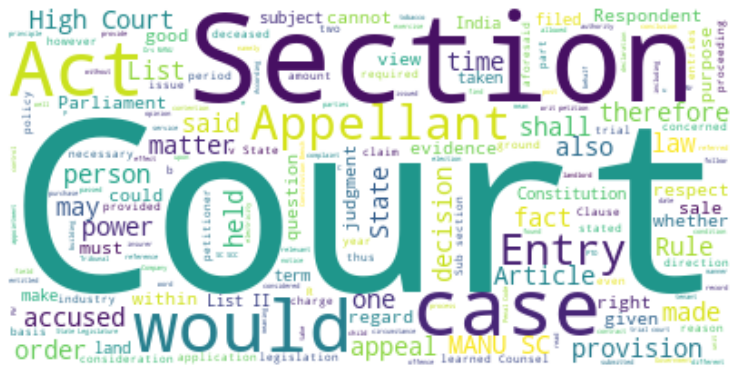

In [106]:
text1=list(set(text['File']))
plt.rcParams['figure.figsize']=(13,13)
wordcloud=WordCloud(max_font_size=180,max_words=200, background_color='white',stopwords=stopwords.words('english')).generate(str(text1))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [93]:
text.dtypes

File        object
Keywords    object
dtype: object

In [54]:
text.describe()

,File,Keywords
count,3961,3961
unique,3855,79
top,1. Leave granted.,"Absence, Accommodation, Amendment, Appeal, App..."
freq,17,313


<h2>Preprocessing Data</h2>

In [55]:
print("Rows: {}\nColumns {}".format(text.shape[0],text.shape[1]))

Rows: 3961
Columns 2


In [56]:
text.isnull().sum()

File        0
Keywords    0
dtype: int64

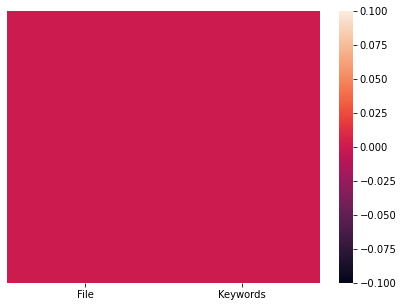

In [57]:
plt.rcParams['figure.figsize']=7,5
sns.heatmap(text.isnull(),yticklabels=False)
plt.show()

<p>The dataset has no null values.</p>

<h3>Encoding labels into numbers</h3>

In [58]:
Keyword_codes=text.groupby(['Keywords']).ngroup()
Keywords=text['Keywords'].unique()

In [59]:
IDs=dict()
for i,j in zip(Keywords,Keyword_codes.unique()):
    IDs.update({j:i})

<h3>Lemmatizing and Cleaning Sentences</h3>

In [60]:
def word_clean(cases):
    processedText=[]
    wordLemm=WordNetLemmatizer()
    urlPattern=r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern='@[^\s]+'
    alphaPattern="[^a-zA-Z0-9]"
    sequencePattern=r"(.)\1\1+"
    seqReplacePattern=r"\1\1"   
    for case in cases:
        case=case.lower()
        case=re.sub(urlPattern,' URL',case)
        case=re.sub(userPattern,' USER',case)        
        case=re.sub(alphaPattern, " ",case)
        case=re.sub(sequencePattern, seqReplacePattern,case)
        casewords = ''
        for word in case.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                casewords += (word+' ')            
        processedText.append(casewords)
    return processedText
processedText=word_clean(text['File'])

In [61]:
processedText

['kurian joseph ',
 'leave granted in special leave petition civil no 12495 of 2015 ',
 'around 46 93 acre of land wa acquired by the respondent state of haryana initiating the proceeding by notification dated 19 09 1983 issued under section of the land acquisition act 1894 the purpose of acquisition is residential and commercial for panchkula sector 21 the acquired property is in village fatehpur in respect of the same development we have seen that this court in many case ha based the fixation of the land value based on acquisition proceeding initiated in 1981 in village judian those property in village judian had access to state highway and the value fixed by this court is r 250 per square yard in respect of property situated in the adjoining village of the appellant namely devi nagar we have fixed land value at the rate of r 250 per square yard that wa the acquisition initiated in the year 1987 and that property had extensive national highway frontage ',
 'learned counsel for the ap

In [62]:
df=pd.DataFrame(data={"File":processedText,"Labels":Keyword_codes})
df.head()

,File,Labels
0,kurian joseph,67
1,leave granted in special leave petition civil ...,67
2,around 46 93 acre of land wa acquired by the r...,67
3,learned counsel for the appellant submitted th...,67
4,shri sanjay kumar tyagi learned additional adv...,67


In [63]:
df.dtypes

File      object
Labels     int64
dtype: object

In [64]:
df['Labels'].unique()

array([67,  2, 77, 68, 24, 41, 70, 15, 22, 34, 13, 14, 75, 76, 55, 40, 30,
        4, 10, 74, 56, 51, 69, 32,  3, 33, 78, 31, 23, 73, 43, 20, 19,  1,
       62,  0, 16, 57, 65, 47, 44, 59, 46, 26, 21, 36, 11, 25, 35, 64, 63,
       52, 42, 38, 28,  6, 60, 54, 12, 18, 29, 45, 61, 39, 17, 71, 49, 72,
        7, 53, 48, 27, 66,  8, 37,  9, 58, 50,  5], dtype=int64)

In [65]:
len(df['Labels'].unique())

79

<h3>Converting to vectors</h3>

In [66]:
vectoriser=TfidfVectorizer(ngram_range=(1,2),max_features=500000)
vectoriser.fit(df['File'])

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [67]:
X=vectoriser.transform(df['File'])

In [68]:
def model_Evaluate(model):
    y_pred=model.predict(X)
    print(classification_report(df['Labels'],y_pred))
    cf_matrix=confusion_matrix(df['Labels'],y_pred)
    print(cf_matrix)
    return y_pred

<h2>Data Modelling</h2>

<h3>1. Bernoulli Naive Bayes</h3>

In [69]:
BNBmodel=BernoulliNB(alpha=0.01)
BNBmodel.fit(X,df['Labels'])
Y1=model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.97      0.91      0.94        92
           2       1.00      0.69      0.82        13
           3       0.93      0.94      0.94       100
           4       0.92      0.98      0.95        48
           5       1.00      0.85      0.92        33
           6       1.00      0.82      0.90       313
           7       1.00      0.95      0.98        66
           8       1.00      0.82      0.90        11
           9       0.46      0.98      0.63       153
          10       0.97      0.83      0.90        42
          11       1.00      0.79      0.88        29
          12       0.78      0.95      0.86        65
          13       1.00      0.90      0.95        40
          14       1.00      0.82      0.90        68
          15       1.00      0.80      0.89        45
          16       1.00      0.87      0.93        23
          17       1.00    

<h3>Accuracy Metrics</h3>

In [70]:
J1=jaccard_score(df['Labels'],Y1,average='micro')
FS1=f1_score(df['Labels'],Y1,average='weighted')
Acc1=metrics.accuracy_score(df['Labels'],Y1)*100

<h3>2. Support Vector Machine</h3>

In [71]:
SVCmodel=LinearSVC()
SVCmodel.fit(X,df['Labels'])
Y2=model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.97      0.98      0.97        92
           2       1.00      1.00      1.00        13
           3       1.00      0.98      0.99       100
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        33
           6       1.00      0.99      0.99       313
           7       1.00      0.97      0.98        66
           8       1.00      0.91      0.95        11
           9       1.00      0.97      0.99       153
          10       1.00      0.88      0.94        42
          11       1.00      0.97      0.98        29
          12       0.98      0.97      0.98        65
          13       1.00      0.93      0.96        40
          14       0.96      1.00      0.98        68
          15       1.00      0.93      0.97        45
          16       1.00      0.96      0.98        23
          17       0.99    

<h3>Accuracy Metrics</h3>

In [72]:
J2=jaccard_score(df['Labels'],Y2,average='micro')
FS2=f1_score(df['Labels'],Y2,average='weighted')
Acc2=metrics.accuracy_score(df['Labels'],Y2)*100

<h3>3. Passive Aggressive Classifier</h3>

In [73]:
PAC=PassiveAggressiveClassifier()
PAC.fit(X,df['Labels'])
Y3=model_Evaluate(PAC)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       1.00      0.97      0.98        92
           2       1.00      1.00      1.00        13
           3       1.00      0.98      0.99       100
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        33
           6       1.00      0.99      0.99       313
           7       0.98      0.98      0.98        66
           8       1.00      0.91      0.95        11
           9       1.00      0.97      0.99       153
          10       0.95      0.95      0.95        42
          11       1.00      0.97      0.98        29
          12       1.00      0.95      0.98        65
          13       0.95      0.95      0.95        40
          14       1.00      0.97      0.99        68
          15       0.96      0.96      0.96        45
          16       0.92      1.00      0.96        23
          17       0.99    

<h3>Accuracy Metrics</h3>

In [74]:
J3=jaccard_score(df['Labels'],Y3,average='micro')
FS3=f1_score(df['Labels'],Y3,average='weighted')
Acc3=metrics.accuracy_score(df['Labels'],Y3)*100

<h3>4. K-Nearest Neighbors</h3>

<h4>Selecting best K value</h4> 

In [75]:
Ks=20
mean_acc1=np.zeros((Ks-1))
std_acc1=np.zeros((Ks-1))
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X,df['Labels'])
    Y4=neigh.predict(X)
    mean_acc1[n-1]=metrics.accuracy_score(df['Labels'],Y4)
    std_acc1[n-1]=np.std(Y4==df['Labels'])/np.sqrt(Y4.shape[0])
print(mean_acc1)
print(std_acc1)

[0.96667508 0.38677102 0.14440798 0.25271396 0.19994951 0.16864428
 0.15273921 0.14112598 0.13153244 0.12042414 0.11436506 0.11007321
 0.10578137 0.10199445 0.09719768 0.09593537 0.09593537 0.09618783
 0.09568291]
[0.00285182 0.00773813 0.00558504 0.00690487 0.00635501 0.00594945
 0.00571586 0.00553179 0.0053702  0.0051712  0.00505675 0.00497297
 0.00488679 0.00480867 0.00470676 0.00467936 0.00467936 0.00468486
 0.00467385]


In [76]:
neigh=KNeighborsClassifier(n_neighbors=1).fit(X,df['Labels'])
Y4=model_Evaluate(neigh)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       1.00      0.97      0.98        92
           2       1.00      1.00      1.00        13
           3       0.95      0.99      0.97       100
           4       1.00      1.00      1.00        48
           5       1.00      1.00      1.00        33
           6       0.99      0.99      0.99       313
           7       1.00      0.97      0.98        66
           8       1.00      0.91      0.95        11
           9       1.00      0.97      0.99       153
          10       0.95      0.98      0.96        42
          11       1.00      0.97      0.98        29
          12       1.00      0.95      0.98        65
          13       0.95      0.95      0.95        40
          14       0.99      0.99      0.99        68
          15       0.54      1.00      0.70        45
          16       0.92      1.00      0.96        23
          17       1.00    

<h3>Accuracy Metrics</h3>

In [77]:
J4=jaccard_score(df['Labels'],Y4,average='micro')
FS4=f1_score(df['Labels'],Y4,average='weighted')
Acc4=metrics.accuracy_score(df['Labels'],Y4)*100

<h3>5. Multinomial Naive Bayes</h3> 

In [78]:
MNB=MultinomialNB(alpha=0.01)
MNB.fit(X,df['Labels'])
Y5=model_Evaluate(MNB)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       1.00      0.97      0.98        92
           2       1.00      1.00      1.00        13
           3       1.00      0.97      0.98       100
           4       1.00      1.00      1.00        48
           5       1.00      0.97      0.98        33
           6       0.86      1.00      0.92       313
           7       1.00      0.97      0.98        66
           8       1.00      0.91      0.95        11
           9       0.99      0.97      0.98       153
          10       1.00      0.88      0.94        42
          11       1.00      0.97      0.98        29
          12       0.98      0.97      0.98        65
          13       1.00      0.90      0.95        40
          14       1.00      0.97      0.99        68
          15       1.00      0.93      0.97        45
          16       1.00      0.96      0.98        23
          17       0.99    

<h3>Accuracy Metrics</h3>

In [79]:
J5=jaccard_score(df['Labels'],Y5,average='micro')
FS5=f1_score(df['Labels'],Y5,average='weighted')
Acc5=metrics.accuracy_score(df['Labels'],Y5)*100

<h3>6. Decision Tree</h3>

<h4>Selecting best depth</h4>

In [80]:
k=50
mean_acc3=np.zeros((k-1))
std_acc3=np.zeros((k-1))
for n in range(1,k):
    Tree=DecisionTreeClassifier(criterion='entropy',max_depth=n)
    Tree.fit(X,df['Labels'])
    Y=Tree.predict(X)
    mean_acc3[n-1]=metrics.accuracy_score(df['Labels'],Y)
    std_acc3[n-1]=np.std(Y==df['Labels'])/np.sqrt(Y.shape[0])
print(mean_acc3)
print(std_acc3)

[0.08861399 0.11966675 0.13632921 0.16233274 0.17924766 0.21282504
 0.24943196 0.2819995  0.32643272 0.36758394 0.4183287  0.46250947
 0.51199192 0.5586973  0.60716991 0.65109821 0.68997728 0.73744004
 0.7816208  0.82479172 0.86064125 0.88740217 0.90078263 0.91062863
 0.91769755 0.9232517  0.92729109 0.92830093 0.92905832 0.93057309
 0.93133047 0.93158293 0.93284524 0.93461247 0.93562232 0.93688463
 0.93738955 0.93814693 0.93839939 0.93865186 0.93890432 0.9396617
 0.93991416 0.94041909 0.94142893 0.94243878 0.94319616 0.94344862
 0.94395355]
[0.00451544 0.00515713 0.00545213 0.00585917 0.00609439 0.00650346
 0.00687494 0.00714964 0.00745049 0.00766086 0.00783782 0.00792215
 0.00794223 0.00788958 0.00775988 0.00757308 0.00734872 0.00699158
 0.00656449 0.00604014 0.0055027  0.00502253 0.00475009 0.00453281
 0.0043667  0.00422953 0.00412572 0.0040992  0.00407915 0.00403865
 0.0040182  0.00401135 0.00397686 0.0039279  0.00389956 0.00386374
 0.00384929 0.00382749 0.00382018 0.00381286 0.003

In [81]:
Tree=DecisionTreeClassifier(criterion='entropy',max_depth=50)
Tree.fit(X,df['Labels'])
Y6=model_Evaluate(Tree)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       0.97      0.92      0.94        92
           2       1.00      0.92      0.96        13
           3       0.95      0.97      0.96       100
           4       1.00      0.98      0.99        48
           5       1.00      0.97      0.98        33
           6       1.00      0.97      0.99       313
           7       1.00      0.97      0.98        66
           8       0.85      1.00      0.92        11
           9       1.00      0.97      0.99       153
          10       0.95      0.98      0.96        42
          11       1.00      0.93      0.96        29
          12       0.98      0.97      0.98        65
          13       0.95      0.95      0.95        40
          14       1.00      0.94      0.97        68
          15       1.00      0.89      0.94        45
          16       1.00      0.96      0.98        23
          17       0.99    

<h3>Accuracy Metrics</h3>

In [82]:
J6=jaccard_score(df['Labels'],Y6,average='micro')
FS6=f1_score(df['Labels'],Y6,average='weighted')
Acc6=metrics.accuracy_score(df['Labels'],Y6)*100

<h2>Train-Set Performance</h2>

In [83]:
per={'Model':['Bernoulli Naive Bayes','Support Vector Machine','Passive Aggressive Classifier','K-Nearest Neighbors',
     'Multinomial Naive Bayes','Decision Tree'],'Accuracy (%)':[round(Acc1,2),round(Acc2,2),round(Acc3,2),round(Acc4,2),
      round(Acc5,2),round(Acc6,2)],
     'Jaccard Index':[J1,J2,J3,J4,J5,J6],'F1-Score':[FS1,FS2,FS3,FS4,FS5,FS6]}
Per=pd.DataFrame(data=per)
Per.set_index('Model',inplace=True)
Per

,Accuracy (%),Jaccard Index,F1-Score
Model,,,
Bernoulli Naive Bayes,86.87,0.767909,0.878655
Support Vector Machine,96.72,0.936446,0.968658
Passive Aggressive Classifier,96.77,0.937393,0.968360
K-Nearest Neighbors,96.67,0.935500,0.968565
Multinomial Naive Bayes,96.06,0.924217,0.960877
Decision Tree,94.45,0.894762,0.948486


<p>Since the <b>SVM</b> model shows the best results, we choose it for predicting the keywords.</p>

<h2>Prediction</h2>

In [84]:
lst3=[]
index=[]
for i in range(100,200):
    name3="C:\\Users\\Rahul Sharma\\Desktop\\Data Sets\\Assignment-datascience\\Test_docs\\case_"+str(i)+"_statement.txt"
    f3=open(name3,"r")
    for x in f3:
        x=x.replace("\n",'')
        if len(x)>0:
            lst3.append(x.replace('\n',''))
    index.append(len(lst3))
f3.close()
text1=pd.DataFrame(data={"File":lst3})
text1.head(10)

,File
0,"P. Venkatarama Reddi, J."
1,1. The opinion recorded by the Kerala High Cou...
2,"""Whether on the facts and in the circumstances..."
3,The High Court accepted the view of the Tribun...
4,2. The facts in brief are: The respondent-asse...
5,"3. On further appeal by the assessee, the Trib..."
6,4. It may be noted that the provision was made...
7,5. The learned senior counsel appearing for th...
8,6. The decision of this Court in Commissioner ...
9,"7. For the reasons aforesaid, we affirm the op..."


<h3>Lemmatizing and Cleaning Sentences</h3>

In [85]:
new=word_clean(text1['File'])

In [86]:
X1=vectoriser.transform(new)

In [87]:
X1.shape

(4531, 108125)

In [88]:
Y_hat=SVCmodel.predict(X1)
Y_hat

array([62, 27, 35, ...,  4, 13,  4], dtype=int64)

In [89]:
Labels=[]
for i in Y_hat:
    Labels.append(IDs[i])
final={"File":new,"Keywords":Labels}
df_final=pd.DataFrame(data=final)
df_final.head(10)

,File,Keywords
0,venkatarama reddi,"Attesting Witness, Consideration, Investigatio..."
1,the opinion recorded by the kerala high court ...,"Acknowledgement, Assurance, Auction, Bill, Buy..."
2,whether on the fact and in the circumstance of...,"Adjudication, Administrative Power, Back Wage,..."
3,the high court accepted the view of the tribun...,"Acknowledgement, Assurance, Auction, Bill, Buy..."
4,the fact in brief are the respondent assessee ...,"Adjudication, Administrative Power, Back Wage,..."
5,on further appeal by the assessee the tribunal...,"Adjudication, Administrative Power, Back Wage,..."
6,it may be noted that the provision wa made in ...,"Adjudication, Administrative Power, Back Wage,..."
7,the learned senior counsel appearing for the i...,"Adjudication, Administrative Power, Back Wage,..."
8,the decision of this court in commissioner of ...,"Assault, Circumstantial Evidence, Corroboratio..."
9,for the reason aforesaid we affirm the opinion...,"Constitutional Validity, Defamation"


In [90]:
df_final.to_csv(r'C:\Users\Rahul Sharma\Desktop\Data Sets\12Keywords_test_set.csv', index = False)

<h3>Prediction for a complete statement</h3>

<p>Here, we will see the maximum keywords predicted for the entire last statement,</p>

In [91]:
df_final['File'][index[-2]:index[-1]]

4513    by this interlocutory application mr jose saba...
4514    issue an interim direction directing to the se...
4515    ii issue an interim direction by appointing co...
4516    we have heard mr biju learned counsel for the ...
4517    it is agonizingly submitted by mr biju that th...
4518    learned counsel should submit that there shoul...
4519    the thrust of his submission is that because o...
4520    mr basant learned senior counsel appearing for...
4521    we think it apt a advised at present that the ...
4522    we have taken assistance of mr dave learned am...
4523    mr justice siri jaga formerly judge of the hig...
4524     the secretary department of law state of kerala 
4525    the director of health service government of k...
4526    the committee shall entertain the complaint wi...
4527    on such fact being recorded this court subject...
4528    10 the committee shall be given the secretaria...
4529    11 a the former judge ha to travel from place ...
4530    12 at 

In [92]:
df_final['Keywords'][index[-2]:index[-1]].value_counts()

Abetment, Abetment of Suicide, Circumstantial Evidence, Commission of the Offence, Commit Suicide, Conviction under, Dowry Death, Dying Declaration, Epileptic Fit, Interested Witness, Reason to Believe, Reasonable Doubt, Rigorous Imprisonment, Suppression, Valuable Security                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      